<a href="https://colab.research.google.com/github/isaac-art/seismo/blob/main/seismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install obspy

     |████████████████████████████████| 24.7 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for obspy: filename=obspy-1.2.2-cp37-cp37m-linux_x86_64.whl size=21665952 sha256=1f7da00f9c608f9e360b737195e3ce4625f81ec3ed8e4f1cbeaf5da8fcbfd2d4
  Stored in directory: /root/.cache/pip/wheels/28/7e/ea/0a37d5f5001d096cf97d6527b60300badd2d0074449e89c736
Successfully built obspy


**AFTER INSTALL RESTART RUNTIME BEFORE IMPORTING**

In [1]:
import numpy as np
from obspy import UTCDateTime
from obspy.io.xseed import Parser
from obspy import read
from obspy.core.stream import Stream
import ftplib
from scipy.io.wavfile import write as wavwrite
import os

In [2]:
os.mkdir('data')
os.mkdir('images')
os.mkdir('audio')

FileExistsError: ignored

In [3]:
bases = ['AQ04'] # LIST OF STATIONS
dirs = ['HHE.D', 'HHN.D', 'HHZ.D'] 
y_d = [('2019', '235'), ('2019', '235')] # LIST OF DATES (year, day_num)


In [4]:
# DOWNLOAD FILES FROM FTP SERVER AND SAVE LOCAL COPIES TO DATA FOLDER

def save_file(ftp, wd, f):
  ftp.cwd(wd)
  with open(f"data/{f}", "wb") as file:
    ftp.retrbinary(f"RETR {f}", file.write)
  ftp.cwd("~")
 
ftp = ftplib.FTP("seiswav.bgs.ac.uk")
ftp.login("anonymous")
print(ftp)
for base in bases:
    for dir in dirs:
        for year, day in y_d:
            print(f"BASE: {base}, DIR: {dir}, YEAR: {year}, DAY: {day}")
            wd = f"{year}/{base}/{dir}/"
            f = f"UR.{base}.00.{dir}.{year}.{day}"
            print(wd, f)
            save_file(ftp, wd, f)

ftp.quit() 


BASE: AQ04, DIR: HHE.D, YEAR: 2019, DAY: 235
2019/AQ04/HHE.D/ UR.AQ04.00.HHE.D.2019.235
BASE: AQ04, DIR: HHE.D, YEAR: 2019, DAY: 235
2019/AQ04/HHE.D/ UR.AQ04.00.HHE.D.2019.235
BASE: AQ04, DIR: HHN.D, YEAR: 2019, DAY: 235
2019/AQ04/HHN.D/ UR.AQ04.00.HHN.D.2019.235
BASE: AQ04, DIR: HHN.D, YEAR: 2019, DAY: 235
2019/AQ04/HHN.D/ UR.AQ04.00.HHN.D.2019.235
BASE: AQ04, DIR: HHZ.D, YEAR: 2019, DAY: 235
2019/AQ04/HHZ.D/ UR.AQ04.00.HHZ.D.2019.235
BASE: AQ04, DIR: HHZ.D, YEAR: 2019, DAY: 235
2019/AQ04/HHZ.D/ UR.AQ04.00.HHZ.D.2019.235


'221 Goodbye.'

data/UR.AQ04.00.HHE.D.2019.235


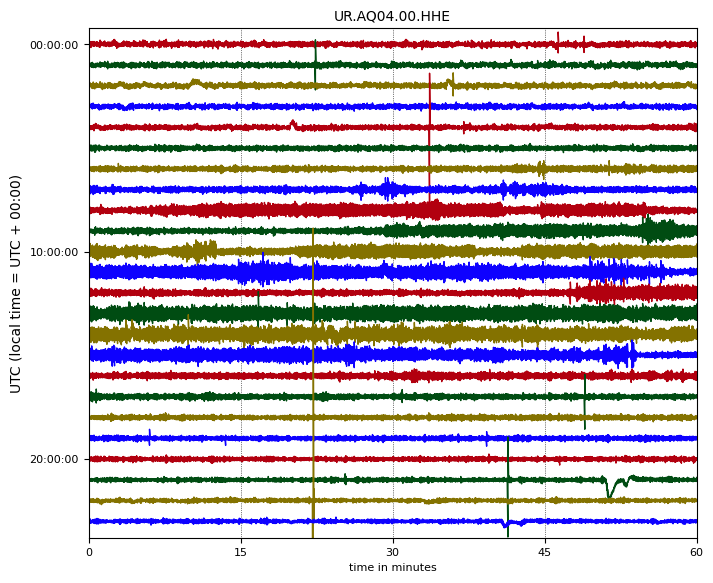

data/UR.AQ04.00.HHZ.D.2019.235


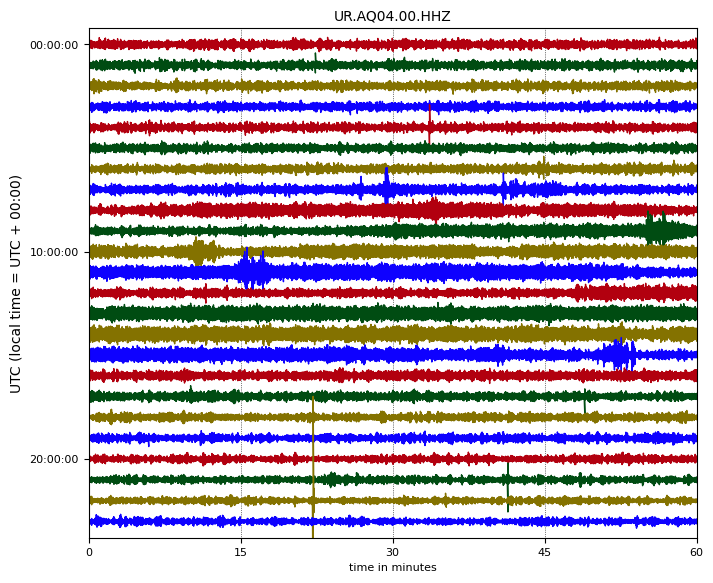

data/UR.AQ04.00.HHN.D.2019.235


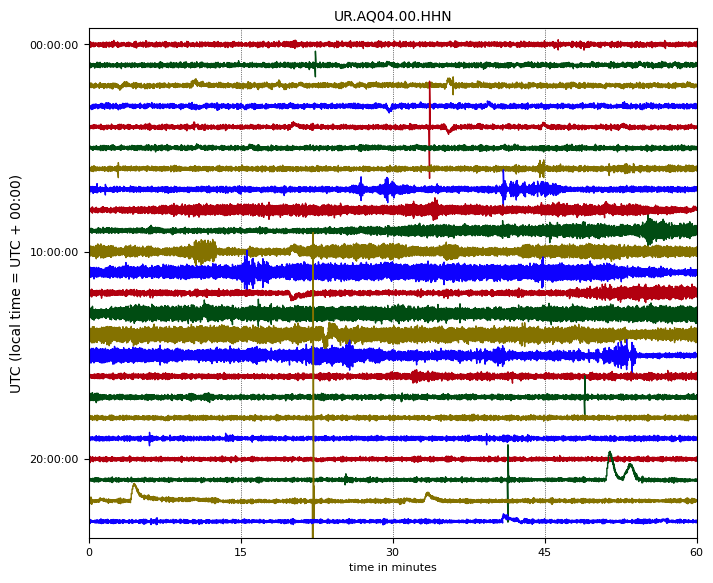

In [5]:
# for each of the files make a plot and save it to the images folder
for f in os.listdir('data'):
  print(f'data/{f}')
  stream = read(f'data/{f}')
  stream.plot(type='dayplot', interval=60)
  stream.plot(type='dayplot', interval=60, outfile=f'images/dayplot_{f}.png')

# # select time range
# dt = stream[0].stats.starttime
# stream.plot(color='red', number_of_ticks=7,
#                    tick_rotation=5, tick_format='%I:%M %p',
#                    starttime=dt + 7.51*60*60, endtime=dt + 7.515*60*60)



In [12]:
# data about the streams/traces
for f in os.listdir('data'):
  print(f'data/{f}')
  stream = read(f'data/{f}')
  print(stream, len(stream))
  trace = stream[0]
  print(trace)
  print(trace.stats)
  print("\n")
  


data/UR.AQ04.00.HHE.D.2019.235
1 Trace(s) in Stream:
UR.AQ04.00.HHE | 2019-08-23T00:00:00.000000Z - 2019-08-23T23:59:59.995000Z | 200.0 Hz, 17280000 samples 1
UR.AQ04.00.HHE | 2019-08-23T00:00:00.000000Z - 2019-08-23T23:59:59.995000Z | 200.0 Hz, 17280000 samples
         network: UR
         station: AQ04
        location: 00
         channel: HHE
       starttime: 2019-08-23T00:00:00.000000Z
         endtime: 2019-08-23T23:59:59.995000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 17280000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 5598, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 22929408})


data/UR.AQ04.00.HHZ.D.2019.235
1 Trace(s) in Stream:
UR.AQ04.00.HHZ | 2019-08-23T00:00:00.000000Z - 2019-08-23T23:59:59.995000Z | 200.0 Hz, 17280000 samples 1
UR.AQ04.00.HHZ | 2019-08-23T00:00:00.000000Z - 2019-08-23T23:59:59.995000Z | 200.0 Hz, 17280000 samples
         

In [9]:
seconds_per_day = 60 * 60 * 24 # spm/mph/hpd
print(seconds_per_day)


86400


In [18]:
# for each file make a wav and save to wavs

SPEED = 205

for f in os.listdir('data'):
  print(f'data/{f}')
  stream = read(f'data/{f}')
  trace = stream[0]
  fmax = np.min([trace.stats.sampling_rate / 2, 20000 / SPEED])

  fmin = 20 / SPEED
  trace.filter('bandpass', freqmin=fmin, freqmax=fmax, zerophase=True)
  trace_audio = trace.copy()
  trace_audio.interpolate(sampling_rate=44100 / SPEED)

  trace_audio.write(f'audio/{f}.wav', format='WAV', width=4, rescale=True, framerate=44100)


data/UR.AQ04.00.HHE.D.2019.235
data/UR.AQ04.00.HHZ.D.2019.235
data/UR.AQ04.00.HHN.D.2019.235


notes:

https://docs.obspy.org/tutorial/index.html


http://www.seismicsoundlab.org/?page_id=44


https://nbviewer.org/github/jbrussell/EI_Live_2020/blob/master/earthquake_sonification/1_bokeh_notebooks/2_earthquake_sonification.ipynb

https://jbrussell.github.io/eilive2020/part2b_tohoku2011/

-------------

OSC WILL ONLY WORK LOCALLY, NOT IN COLABS

In [ ]:
!pip install python-osc

In [3]:
import random
import time

from pythonosc import udp_client


client = udp_client.SimpleUDPClient("127.0.0.1", 5005)

for x in range(10):
  client.send_message("/filter", random.random())
  time.sleep(1)